# Analítica de datos
# Examen parcial 1
# 2019-02

# <font color='red'> Steven Bernal Tovar, A00021016 </font>

# <font color='red'>ENTREGA PRIMERA PARTE</font> - <font color='blue'> EN CLASE </font>

Usted es el encargado de analítica de una empresa de telefonía celular y tiene que proporcionar soluciones para hacer frente a las problemáticas de un sector que ha llegado a saturación del mercado. Tanto su empresa como sus competidores directos tienen que disputarse por una base de clientes limitada, de tal forma que usted tiene que responder a un objetivo estratégico definido por la dirección así:  

    "Mantener y fidelizar a nuestros clientes por medio de un servicio de calidad que se adapte a sus necesidades particulares."
    
Su compañía dispone de una base de datos histórica de personas que hace un año eran clientes propios. Algunos de esos clientes siguen siéndolo hoy en día, otros ya no lo son. La idea es podeer identificar los clientes que son propensos a dejar la compañía, para poder pensar en programas de fidelización preventivos.

Los campos del dataset son los siguientes:
1.  ID: Código identificador de los clientes de la compañía de telefonía móvil
1.	ESTADO: Describe si el usuario sigue con la compañía (VINCULADO) o no (RETIRADO)
1.	INGRESOS: Promedio de ingresos del cliente en pesos
1.	CASA: Precio de la casa en la que vive el cliente en pesos
1.	PRECIO_DISPOSITIVO: Precio del celular del cliente en pesos
1.  GÉNERO: "Hombre" o "Mujer"
1.	MESES: Antigüedad del usuario en meses
1.	DURACION: Promedio de duración de las llamadas hechas por el cliente en minutos
1.	SOBRECARGO: Promedio de minutos que se sobrepasa el usuario en un mes
1.	SALDO_RESTANTE: Promedio de minutos de su plan que le quedan al usuario sin utilizar cada mes
1.	SATISFACCION: nivel de satisfacción del usuario de 0 a 10 (muy satisfecho), obtenido a partir de una encuesta.

La idea es poder predecir el ESTADO a partir de las otras variables, utilizando modelos de aprendizaje supervisado (KNN, NaiveBayes, y regresión logística).

# 1. Entendimiento de los datos, limpieza

El archivo "DatosTelco.csv" contiene el dataset que tienen que analizar.
Se recomienda abrirlo primero en un lector de archivos planos para entender preliminarmente su formato y así poderlo cargar adecuadamente con Python.

Teniendo en cuenta el tipo de problema en cuestión (clasificación o regresión), realice un análisis exploratorio de los datos estableciendo el baseline, verificando la calidad de los datos (tipos de las variables, valores inválidos, excepciones, valores faltantes, etc.), utilizando gráficos para poder entender las distribuciones de los datos e identificar posibles problemas.

Tenga en cuenta lo siguiente: 
- para modificar ciertos valores de un dataframe, se utiliza "df.replace('oldvalue', 'newvalue')", si se trata de un valor NaN, se utiliza *np.nan* (ya sea el oldvalue o el newvalue)
- para cambiar un tipo de dato a numérico en una estructura de pandas, se utiliza su método ".astype('float64')"
- para negar una condición en python se utiliza el símbolo "~"
- para obtener una tabla de frecuencias de los registros (filas) con respecto al valor de una variable categórica se utiliza "pd.crosstab(index=df['var'], columns="conteo")
- para cambiar los valores de una columna en un dataframe con condiciones, utilizar "df.loc[condicion, 'columna']=newVal"
- cuando haya atributos con demasiados valores faltantes, pueden eliminar la columna correspondiente.
- cuando haya atributos con unos pocos valores faltantes, pueden eliminar los registros correspondientes.
- cuando el número de valores faltantes de un atributo no sea tan elevado, pero si sea considerable, pueden reemplazar los valores faltantes:
  - Si se trata de una variable categórica, pueden crear un nuevo valor, o reemplazar por la categoría más común
  - Si se trata de una variable numérica, pueden reemplazar por el promedio de los valores presentes del atributo
- cuando se quiere ordenar un dataframe por los valores de una columna se usa "df.sort_values("COLUMNA", ascending=True)"
- para borrar los registros a partir de un índice de fila se utiliza "df.drop([0,3])"
- para borrar los registros a partir de una condición se utiliza "df = df[df.edad<99]"
- para borrar una columna por nombre se utiliza --> df = df.drop('columna',axis=1) 

# Puntos a desarrollar

DURANTE EL EXAMEN, EN CLASE: 
1. <font color='red'>Carguen el archivo en memoria y exploren los datos. Antes de hacer limpieza identifiquen, el baseline global (0.1) y los baselines por GÉNERO (0.2).
   ¿A primera vista, solo considerando el género, cree que es una buena idea crear un modelo predictivo de la deserción de hombres y de mujeres de manera separada? (0.2).</font>
2. <font color='red'>Identifiquen los problemas e inconsistencias que tienen los datos, teniendo en cuenta el diccionario de datos y el contexto del problema. Limpien los datos, argumentando las razones de cada transformación o eliminación de datos.
(1.1). </font>

EN CASA, PARA ENTREGAR: 
3. <font color='red'>Para arreglar un problema existente en la variable CASA: (1.0)
    * utilice un modelo de regresión lineal (use el modelo sklearn.linear_model.LinearRegression, no use statsmodels)
    * considere solo las demas variables NUMÉRICAS como variables predictivas
    * cree el mejor modelo que utilice 1 solo variable, calcule el R2 ajustado e interprételo
    * utilice holdout (70/30) como protocolo de evaluación
</font>

# 1.1 Carga y baselines pre-limpieza de datos

In [89]:
import numpy as np #operaciones matriciales y con vectores
import pandas as pd #tratamiento de datos
import matplotlib.pyplot as plt #gráficos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression # modelos lineales
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split #metodo de particionamiento de datasets para evaluación
from sklearn.model_selection import cross_val_score #protocolo de evaluación
from sklearn import datasets, metrics
from sklearn import preprocessing
import seaborn as sns

In [90]:
%matplotlib inline

In [91]:
dTelco = pd.read_csv('DatosTelco.csv', sep=";")
dTelco.head()

,ID,ESTADO,INGRESOS,CASA,PRECIO_DISPOSITIVO,GENERO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION
0,1,VINCULADO,4074840,6.878215e+08,1444153.0,Mujer,26,2.3,11.167542,20.3,1.762872
1,2,VINCULADO,8574088,1.349120e+09,2157661.0,Hombre,23,3.7,0.000000,53.5,3.361266
2,3,RETIRADO,795993,1.326558e+08,452809.0,Mujer,38,16.8,350.610224,13.9,8.359438
3,4,RETIRADO,8115015,1.290405e+09,2617184.0,Mujer,37,17.6,230.913888,45.7,8.964017
4,5,RETIRADO,8187499,1.305348e+09,666069.0,Mujer,19,0.0,131.541983,67.2,8.808206


Podemos ver datos de nuestro datos. A simple vista podemos notar que la mayor frecuencia en nuestro target es Retirado, que hay  dispositivos con un precio anormal, que la frecuencia mas alta en genero es hombre, 

In [92]:
dTelco.drop('ID',inplace=True, axis=1)

In [93]:
dTelco.describe(include="all")

,ESTADO,INGRESOS,CASA,PRECIO_DISPOSITIVO,GENERO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION
count,23157,2.316200e+04,2.306200e+04,2.316200e+04,23162,23162.000000,23162.000000,23159.000000,23162.000000,23162.000000
unique,2,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN
top,RETIRADO,NaN,NaN,NaN,Hombre,NaN,NaN,NaN,NaN,NaN
freq,11660,NaN,NaN,NaN,11647,NaN,NaN,NaN,NaN,NaN
mean,NaN,4.813115e+06,7.823571e+08,1.454784e+06,NaN,23.862620,9.609852,110.050331,42.991888,5.480840
std,NaN,2.737374e+06,5.540029e+08,1.427590e+07,NaN,14.816863,7.040007,100.769297,30.204540,2.809938
min,NaN,1.500000e+05,-1.779042e+07,1.693380e+02,NaN,-55.000000,0.000000,0.000000,0.000000,0.613580
25%,NaN,2.156296e+06,3.660683e+08,6.571840e+05,NaN,14.000000,2.100000,12.568985,15.200000,2.705504
50%,NaN,6.137553e+06,9.703263e+08,1.237542e+06,NaN,24.000000,14.600000,75.379060,37.650000,4.064550
75%,NaN,7.347180e+06,1.171952e+09,1.829751e+06,NaN,34.000000,16.100000,201.529547,70.000000,8.268244


Los features Estado, Casa y Sobrecargo presentan numeros nulos

In [94]:
dTelco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23162 entries, 0 to 23161
Data columns (total 10 columns):
ESTADO                23157 non-null object
INGRESOS              23162 non-null int64
CASA                  23062 non-null float64
PRECIO_DISPOSITIVO    23162 non-null float64
GENERO                23162 non-null object
MESES                 23162 non-null int64
DURACION              23162 non-null float64
SOBRECARGO            23159 non-null float64
SALDO_RESTANTE        23162 non-null float64
SATISFACCION          23162 non-null float64
dtypes: float64(6), int64(2), object(2)
memory usage: 1.8+ MB


## Baseline Global

##### Retirado

In [95]:
reti = (dTelco['ESTADO'] == "RETIRADO")
dTaframeRetirado = dTelco[reti]
display(dTaframeRetirado.shape[0]/dTelco.shape[0])

0.5034107590018133

In [96]:
display(len(dTaframeRetirado)/len(dTelco))

0.5034107590018133

##### Vinculado

In [97]:
vincu = (dTelco['ESTADO'] == 'VINCULADO')
dTaframeVinculado = dTelco[vincu]
display(dTaframeVinculado.shape[0]/dTelco.shape[0])

0.4963733701752871

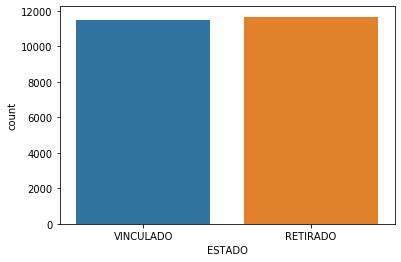

In [98]:
fig, ax = plt.subplots()
sns.countplot(x=dTelco['ESTADO'], data=dTelco)
ax.set_xticklabels(dTelco['ESTADO'].unique())

plt.show()

## Baseline Genero

####  Hombre

In [99]:
hombre = (dTelco['GENERO'] == 'Hombre')
dTaframeHombre = dTelco[hombre]
display(dTaframeHombre.shape[0]/dTelco.shape[0])

0.5028494948622744

In [100]:
dTelco['GENERO'].unique()

array(['Mujer', 'Hombre'], dtype=object)

#### Mujer

In [101]:
mujer = (dTelco['GENERO'] == 'Mujer')
dTaframeMujer = dTelco[mujer]
display(dTaframeMujer.shape[0]/dTelco.shape[0])

0.4971505051377256

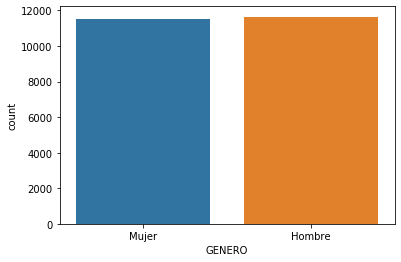

In [102]:
fig, ax = plt.subplots()
sns.countplot(x=dTelco['GENERO'], data=dTelco)
ax.set_xticklabels(dTelco['GENERO'].unique())

plt.show()

## Exploracion y Limpieza de los datos

#### Contamos los valores nulos

En toda la base de datos existen 108 datos falsos

In [103]:
avaliable = (dTelco.notnull())
avaliable.all(axis=1).value_counts()

True     23054
False      108
dtype: int64

#### Que columnas tienen valores nulos

Como podemos apreciar el feature Estados presenta 5 valores nulos. Casa presenta 100 y sobrecargo 3

In [104]:
dTelco.notnull().apply(pd.Series.value_counts)

,ESTADO,INGRESOS,CASA,PRECIO_DISPOSITIVO,GENERO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION
False,5,NaN,100,NaN,NaN,NaN,NaN,3,NaN,NaN
True,23157,23162.0,23062,23162.0,23162.0,23162.0,23162.0,23159,23162.0,23162.0


#### Eliminamos valores nulos

In [105]:
dTelco.dropna(inplace=True, axis=0)

In [106]:
dTelco.notnull().apply(pd.Series.value_counts)

,ESTADO,INGRESOS,CASA,PRECIO_DISPOSITIVO,GENERO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION
True,23054,23054,23054,23054,23054,23054,23054,23054,23054,23054


In [107]:
dTafreameNumerico = (dTelco.dtypes == 'int64')|(dTelco.dtypes == 'float64')
dTafreameNumerico

ESTADO                False
INGRESOS               True
CASA                   True
PRECIO_DISPOSITIVO     True
GENERO                False
MESES                  True
DURACION               True
SOBRECARGO             True
SALDO_RESTANTE         True
SATISFACCION           True
dtype: bool

In [108]:
dTafremText = (dTelco.dtypes == 'object')
dTafremText

ESTADO                 True
INGRESOS              False
CASA                  False
PRECIO_DISPOSITIVO    False
GENERO                 True
MESES                 False
DURACION              False
SOBRECARGO            False
SALDO_RESTANTE        False
SATISFACCION          False
dtype: bool

In [109]:
dTafreameNumerico = [c for c in dTafreameNumerico.index if dTafreameNumerico[c]]
dTafreameNumerico

['INGRESOS',
 'CASA',
 'PRECIO_DISPOSITIVO',
 'MESES',
 'DURACION',
 'SOBRECARGO',
 'SALDO_RESTANTE',
 'SATISFACCION']

In [110]:
dTafremText = [c for c in dTafremText.index if dTafremText[c]]
dTafremText

['ESTADO', 'GENERO']

In [111]:
dTafreameNumerico = dTelco[dTafreameNumerico]
dTafreameNumerico.tail()

,INGRESOS,CASA,PRECIO_DISPOSITIVO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION
23157,473169,8.888342e+07,1128088.0,28,14.9,153.90060,18.6,8.359296
23158,3544204,5.350386e+08,332460.0,0,2.0,20.31440,16.4,2.670153
23159,7523054,1.158340e+09,296138.0,6,17.8,290.73090,58.9,8.510907
23160,1205914,2.737018e+08,2206199.0,44,16.1,139.29630,18.2,8.773616
23161,8343704,1.328386e+09,2022312.0,0,16.8,21.57594,64.9,2.332979


In [112]:
dTafremText = dTelco[dTafremText]
dTafremText.tail()

,ESTADO,GENERO
23157,RETIRADO,Hombre
23158,VINCULADO,Mujer
23159,RETIRADO,Mujer
23160,VINCULADO,Mujer
23161,VINCULADO,Hombre


#### Valores Atipico

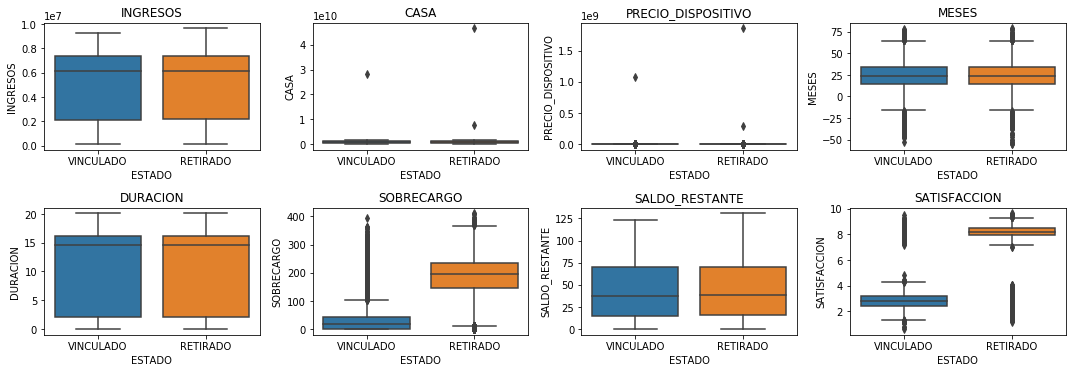

In [114]:
fig = plt.figure(figsize=(15,10))
i=1

for var_num in dTafreameNumerico:
    ax = fig.add_subplot(4, 4, i) #Defino una tabla de 2 filas por 2 columnas, agrego el i-ésimo plot
    plt.title(var_num)
    sns.boxplot(x=dTafremText['ESTADO'], y=var_num, data=dTelco)
    ax.set_xticklabels(dTafremText['ESTADO'].unique())
    fig.tight_layout()
    i+=1

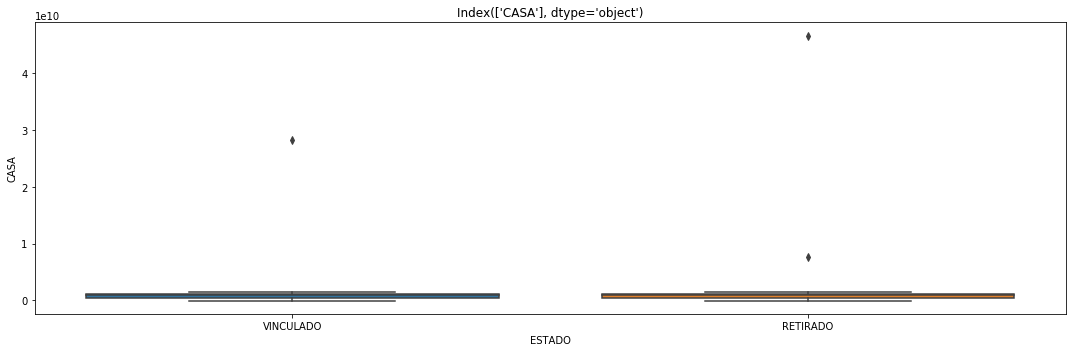

In [129]:
fig = plt.figure(figsize=(15,5))
plt.title(dTelco[['CASA']].columns)
sns.boxplot(x=dTafremText['ESTADO'], y=dTelco['CASA'], data=dTelco)
ax.set_xticklabels(dTafremText['ESTADO'].unique())
fig.tight_layout()

In [137]:
mas = (dTelco['CASA']>1e10)
dTelco[mas]


,ESTADO,INGRESOS,CASA,PRECIO_DISPOSITIVO,GENERO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION
18828,VINCULADO,7865640,2.825605e+10,1.083085e+09,Hombre,30,17.0,50.81118,90.5,2.443531
21377,RETIRADO,953506,4.664422e+10,1.859365e+09,Mujer,9,15.2,13.48439,23.0,2.551827


In [138]:
dTelco = dTelco[dTelco['CASA'].between(dTelco['CASA'].quantile(0.01),dTelco['CASA'].quantile(0.99))]

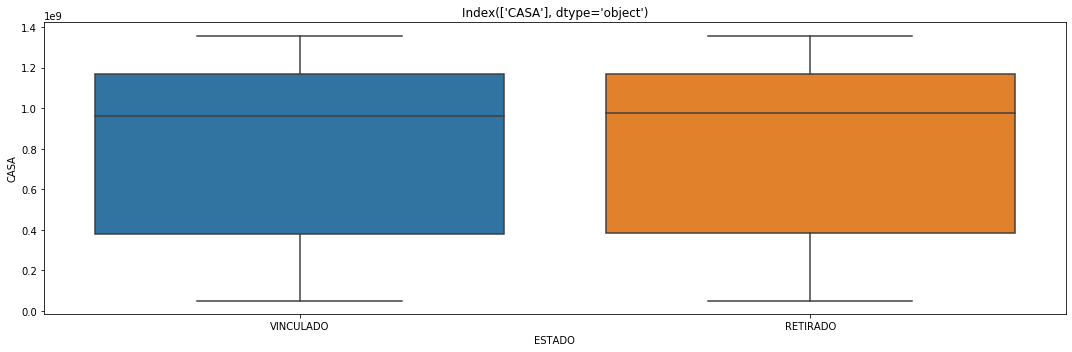

In [139]:
fig = plt.figure(figsize=(15,5))
plt.title(dTelco[['CASA']].columns)
sns.boxplot(x=dTafremText['ESTADO'], y=dTelco['CASA'], data=dTelco)
ax.set_xticklabels(dTafremText['ESTADO'].unique())
fig.tight_layout()

In [140]:
dTelco.describe()

,INGRESOS,CASA,PRECIO_DISPOSITIVO,MESES,DURACION,SOBRECARGO,SALDO_RESTANTE,SATISFACCION
count,2.259200e+04,2.259200e+04,2.259200e+04,22592.000000,22592.000000,22592.000000,22592.000000,22592.000000
mean,4.821079e+06,7.804101e+08,1.315030e+06,23.861588,9.544826,110.057990,42.982808,5.480532
std,2.699959e+06,4.184128e+08,7.470786e+05,14.799829,7.047061,100.744570,30.191447,2.809486
min,1.500000e+05,5.171519e+07,1.693380e+02,-55.000000,0.000000,0.000000,0.000000,0.613580
25%,2.251016e+06,3.828643e+08,6.582580e+05,14.000000,2.100000,12.580780,15.200000,2.705159
50%,6.133381e+06,9.703263e+08,1.238396e+06,24.000000,14.500000,75.458705,37.600000,4.077089
75%,7.334774e+06,1.169661e+09,1.827900e+06,34.000000,16.100000,201.559425,69.900000,8.267844
max,8.824001e+06,1.358020e+09,4.531737e+06,79.000000,20.100000,411.168400,130.700000,9.642618


...

...

...

### Baseline global

...

...

...

### Baselines por género

...

...

...

### Conclusión

...

...

...

# 1.2 Análisis de los problemas de calidad de datos

...

...

...

### Resumen de problemas encontrados, acciones tomadas:

1. [variable] [tipo de problema]: [solución argumentada]

1. [variable] [tipo de problema]: [solución argumentada]

                    
                    

# <font color='red'>ENTREGA SEGUNDA PARTE</font> - <font color='blue'> POST-CLASE </font>

# 1.3 Valores faltantes de CASA: modelo de regresión lineal usando holdout y forward stepwise

...

...

...

# 2. Modelos de clasificación

## Puntos a desarrollar:

<font color='red'>El objetivo final es identificar los clientes más propensos a irse de la compañía, con el fin de poder realizar campañas de fidelización. Para tal propósito, se ha decidido buscar el mejor modelo entre **K-NN** y **Naïve Bayes**, pero **solo considerando las variables predictivas numéricas**. </font>

1. <font color='red'> Establezca el **protocolo de evaluación** y la métrica de evaluación más adecuados para la construcción de los modelos de clasificación (0.3)</font>

2. <font color='red'> Construya del mejor modelo **K-NN**, buscando el mejor valor de K (subir hasta un valor de K=25) (1.1)</font>

3. <font color='red'> Construya del mejor modelo **Naïve Bayes** (use la clase GaussianNB), buscando el mejor valor del suavizador de Laplace (var_smoothing) (0.7)</font>

4. <font color='red'> Compárelos (métricas, matriz de confusión), escoja el mejor, y concluya (0.3)</font>

# 2.1 Protocolo de evaluación

...

...

...

# 2.2 Modelo K-NN

...

...

...

# 2.3 Modelo Naïve Bayes

...

...

...

# 2.4 Comparación

...

...

...